# 국내 온라인 뱅킹 앱
- KB 국민은행 스타뱅킹
- 우리은행 우리WON뱅킹
- 카카오뱅크
- 토스
- 시한 쏠(SOL)-신한은행 스마트폰 뱅킹
- i-one Bank
- NH스마트뱅킹
- SC제일은행 모바일 랭킹

# Overview

<b> 1. Import Dataset <br>
<b> 2. Pre-processing <br>
<b> 3. LDA Modeling <br>
<b> 4. Word Cloud <br>
<b> 5. Sample Review that represent Topic     

In [174]:
import json
import pandas as pd
from tqdm import tqdm

import seaborn as sns
import matplotlib.pyplot as plt

from pygments import highlight
from pygments.lexers import JsonLexer
from pygments.formatters import TerminalFormatter

from google_play_scraper import Sort, reviews, app

%matplotlib inline
%config InlineBackend.figure_format='retina'

sns.set(style='whitegrid', palette='muted', font_scale=1.2)

In [175]:
app_packages=[
    'com.kbstar.kbbank',
    'com.wooribank.smart.npib',
    'com.kakaobank.channel',
    'viva.republica.toss',
    'com.shinhan.sbanking',
    'com.ibk.android.ionebank',
    'nh.smart.banking',
    'com.scbank.ma30'
]

In [176]:
app_reviews = []

for ap in tqdm(app_packages): #app_packages에 있는 각 앱 패키지에 대해 반복하고,
# 각 앱에 대해 1부터 5까지의 점수와 정렬 방법(MOST_RELEVANT, NEWEST)에 대해 반복합니다.
  for score in list(range(1, 6)):
    for sort_order in [Sort.MOST_RELEVANT, Sort.NEWEST]:
      rvs, _ = reviews(
        ap,
        lang='ko',
        country='KR',
        sort=sort_order,
        count= 200 if score == 3 else 100, 
        filter_score_with=score # 현재 score에 해당하는 리뷰만 가져옵니다.
      )
      for r in rvs:
        r['sortOrder'] = 'most_relevant' if sort_order == Sort.MOST_RELEVANT else 'newest' 
        #sort_order가 MOST_RELEVANT이면 'most_relevant'를, NEWEST이면 'newest'를 rvs에 추가합니다.
        r['appId'] = ap # 앱 패키지를 rvs에 추가합니다.
      app_reviews.extend(rvs) #rvs를 app_reviews에 추가합니다.

100%|██████████| 8/8 [01:27<00:00, 10.90s/it]


In [177]:
def print_json(json_object):
  json_str = json.dumps(
    json_object,
    indent=2,
    sort_keys=True,
    default=str
  )
  print(highlight(json_str, JsonLexer(), TerminalFormatter()))

In [178]:
print_json(app_reviews[0])

{
  "appId": "com.kbstar.kbbank",
  "appVersion": "G6.2.22",
  "at": "2023-11-29 23:29:00",
  "content": "\uae08\uc735\ucfe0\ud3f0\uc744 \ubc1b\uace0 \ud070\ub9d8\uba39\uace0 \ub2e4\uc2dc \uc124\uce58\ud574\uc11c \uc801\uae08 \uacc4\uc88c\ub97c \ub9cc\ub4e4\uc5b4 \ubcf4\ub824\uace0 \ud588\uc2b5\ub2c8\ub2e4. \uc9c4\uc9dc \ub108\ubb34 \ud798\ub4ed\ub2c8\ub2e4. \ub108\ubb34 \ubcf5\uc7a1\ud558\uace0, \uacc4\uc88c \ud734\uba74 \ud574\uc81c\ud574\uc57c\ud55c\ub2e4\ub294\ub370, \uc778\uc99d \ub2e4\ud588\ub294\ub370, \uacc4\uc88c \uc120\ud0dd\uc774 \uc548\ub429\ub2c8\ub2e4. \uc120\ud0dd \ud560 \uc218 \uc788\ub294\uac8c \uc5c6\ub294 \uc0c1\ud0dc\uc778\ub370, \uadf8\uac74 \uc548\ud558\uba74 \ub2e4\uc74c\uc73c\ub85c \uc9c4\ud589\uc774 \uc548\ub429\ub2c8\ub2e4. \ub9c9\ub2e4\ub978 \uace8\ubaa9\uc5d0\uc11c \ud5e4\ub9e4\ub2e4 \ub098\uc624\ub2c8 \ub2e4\uc2dc \ub610 \uc2dc\uc791\uc774\ub124\uc694.\u3160 \uc9c4\uc9dc \uc0ac\uc6a9\uc790 \uacbd\ud5d8 \ucd5c\uc545\uc785\ub2c8\ub2e4. SW\uac1c\ubc1c\uc790\uc

In [179]:
app_infos = []

for ap in tqdm(app_packages):
  info = app(ap, lang='ko', country='KR')
  del info['comments']
  app_infos.append(info)

100%|██████████| 8/8 [00:12<00:00,  1.51s/it]


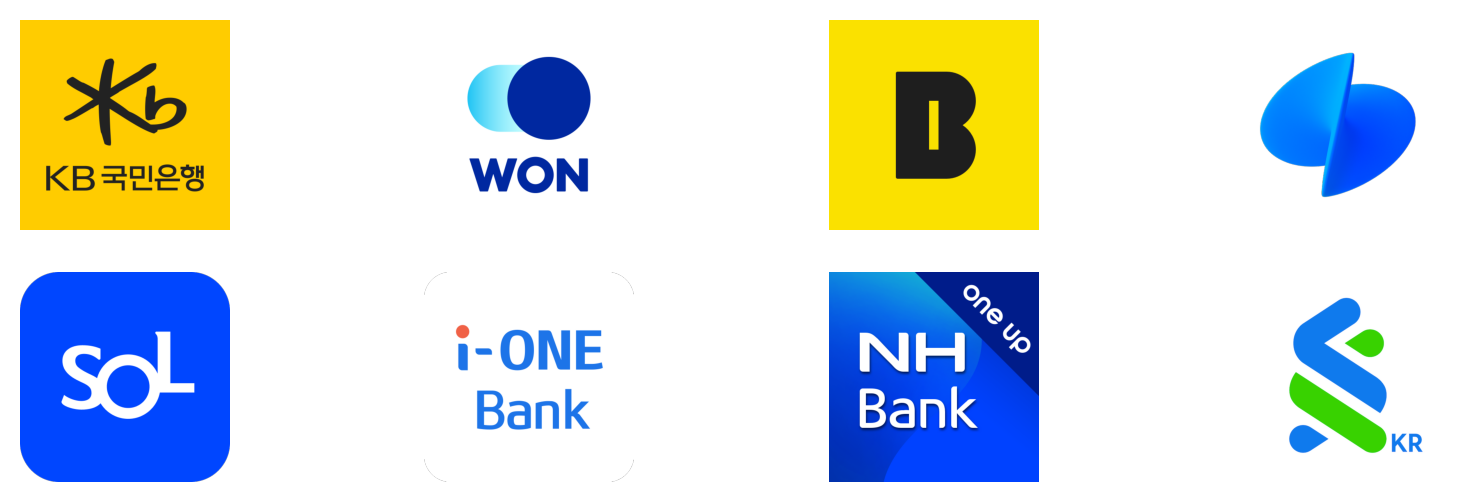

In [180]:
import urllib
import numpy as np
from PIL import Image  # Image 클래스를 가져옵니다.
import matplotlib.pyplot as plt

def format_title(title):
  sep_index = title.find(':') if title.find(':') != -1 else title.find('-')
  if sep_index != -1:
    title = title[:sep_index]
  return title[:10]

fig, axs = plt.subplots(2, len(app_infos) // 2, figsize=(10, 3))

for i, ax in enumerate(axs.flat):
    ai = app_infos[i]
    img = Image.open(urllib.request.urlopen(ai['icon']))
    ax.imshow(np.array(img))
    ax.axis('off')

In [181]:
app_infos_df = pd.DataFrame(app_reviews)
app_infos_df.to_csv('apps.csv', index=None, header=True)

### 총 리뷰 개수

In [182]:
len(app_reviews)

9552

In [183]:
app_reviews_df = pd.DataFrame(app_reviews)
app_reviews_df.to_csv('reviews.csv', index=None, header=True)

### 필요 라이브러리 다운로드

In [184]:
!pip install numpy
!pip install pandas
!pip install konlpy
!pip install tqdm
!pip install gensim
!pip install pyLDAvis
!pip install --user pyLDAvis

### 패키지 불러오기

In [185]:
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings(action='ignore')
from tqdm import tqdm
import re
from gensim import corpora
import gensim
from collections import Counter

# 1. Import Dataset(크롤링)

### 1-1) 리뷰 데이터 불러오기

In [186]:
dataset_raw = pd.read_csv('reviews.csv')
dataset_raw.head()

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion,sortOrder,appId
0,0acfbfe1-1b4c-4d68-8912-f404532b3ff1,맛소금,https://play-lh.googleusercontent.com/a-/ALV-U...,금융쿠폰을 받고 큰맘먹고 다시 설치해서 적금 계좌를 만들어 보려고 했습니다. 진짜 ...,1,120,G6.2.22,2023-11-29 23:29:00,"안녕하세요, 고객님! KB스타뱅킹 이용에 불편을 드려 죄송합니다. 거래 중 어려움을...",2023-11-30 15:58:53,G6.2.22,most_relevant,com.kbstar.kbbank
1,78b0f89d-8e5a-4191-99ef-99154611793e,가을봄 (가을봄),https://play-lh.googleusercontent.com/a/ACg8oc...,몇년 동안 쓴 어플이지만 이번에 전자문서 받기 동의후 로그인 안되는 문제가 생겨 삭...,1,235,G6.2.20,2023-11-14 12:27:51,"안녕하세요, 가을봄(가을봄)고객님. KB스타뱅킹 이용에 불편을 드려 진심으로 죄송합...",2023-11-14 16:09:49,G6.2.20,most_relevant,com.kbstar.kbbank
2,6d9d2103-785b-44db-a727-f923c5f8b8b2,Mi young Kim,https://play-lh.googleusercontent.com/a/ACg8oc...,"kb스타뱅킹을 통한 kb pay 결제를 선택한 경우, 잘 안되는 경우가 많습니다. ...",1,287,G6.2.16,2023-08-29 22:20:09,"고객님, 안녕하세요! KB스타뱅킹 內 KB Pay 이용에 불편을 드려 죄송합니다. ...",2023-08-30 10:20:26,G6.2.16,most_relevant,com.kbstar.kbbank
3,1d3e56a6-f7f6-4da6-a3ad-4c8bdab5c63c,Am I,https://play-lh.googleusercontent.com/a-/ALV-U...,"홈화면개편.. 불필요한정보가 많아서 보기가어렵네요. 순서바꾸기, 메뉴삭제는 가능한데...",1,124,G6.2.16,2023-07-28 21:53:37,"Am I 고객님, 안녕하세요! 7.26일 개편된 홈화면은 고객의견, 유저테스트 등 ...",2023-07-31 18:06:01,G6.2.16,most_relevant,com.kbstar.kbbank
4,5eb03618-ae7e-4d3e-b951-4607e1f97bdf,HJ K,https://play-lh.googleusercontent.com/a-/ALV-U...,"앱이 직관적이지가 않아요. 금융 상품 가입하는데 다음 버튼은 활성화안되어있고, 무엇...",1,113,G6.2.15,2023-06-29 10:44:57,"고객님, 안녕하세요! KB스타뱅킹 이용에 불편을 드려 죄송합니다. KB스타뱅킹 '금...",2023-06-29 12:07:39,G6.2.15,most_relevant,com.kbstar.kbbank


In [187]:
dataset_raw['appId'].unique()

array(['com.kbstar.kbbank', 'com.wooribank.smart.npib',
       'com.kakaobank.channel', 'viva.republica.toss',
       'com.shinhan.sbanking', 'com.ibk.android.ionebank',
       'nh.smart.banking', 'com.scbank.ma30'], dtype=object)

### 1-2) app_package 명 새로 매핑

In [188]:
# Create a mapping for replacements
replacement_mapping = {
    'com.kbstar.kbbank': 'KB',
    'com.wooribank.smart.npib': 'WOORI',
    'com.kakaobank.channel': 'KAKAO',
    'viva.republica.toss': 'TOSS',
    'com.shinhan.sbanking': 'SHINHAN',
    'com.ibk.android.ionebank': 'IBK',
    'nh.smart.banking': 'NH',
    'com.scbank.ma30': 'SC'
}

# Use the replace method
dataset_raw['appId'] = dataset_raw['appId'].replace(replacement_mapping)

# Verify the changes
print(dataset_raw['appId'].unique())

['KB' 'WOORI' 'KAKAO' 'TOSS' 'SHINHAN' 'IBK' 'NH' 'SC']


In [189]:
dataset_raw.head()

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion,sortOrder,appId
0,0acfbfe1-1b4c-4d68-8912-f404532b3ff1,맛소금,https://play-lh.googleusercontent.com/a-/ALV-U...,금융쿠폰을 받고 큰맘먹고 다시 설치해서 적금 계좌를 만들어 보려고 했습니다. 진짜 ...,1,120,G6.2.22,2023-11-29 23:29:00,"안녕하세요, 고객님! KB스타뱅킹 이용에 불편을 드려 죄송합니다. 거래 중 어려움을...",2023-11-30 15:58:53,G6.2.22,most_relevant,KB
1,78b0f89d-8e5a-4191-99ef-99154611793e,가을봄 (가을봄),https://play-lh.googleusercontent.com/a/ACg8oc...,몇년 동안 쓴 어플이지만 이번에 전자문서 받기 동의후 로그인 안되는 문제가 생겨 삭...,1,235,G6.2.20,2023-11-14 12:27:51,"안녕하세요, 가을봄(가을봄)고객님. KB스타뱅킹 이용에 불편을 드려 진심으로 죄송합...",2023-11-14 16:09:49,G6.2.20,most_relevant,KB
2,6d9d2103-785b-44db-a727-f923c5f8b8b2,Mi young Kim,https://play-lh.googleusercontent.com/a/ACg8oc...,"kb스타뱅킹을 통한 kb pay 결제를 선택한 경우, 잘 안되는 경우가 많습니다. ...",1,287,G6.2.16,2023-08-29 22:20:09,"고객님, 안녕하세요! KB스타뱅킹 內 KB Pay 이용에 불편을 드려 죄송합니다. ...",2023-08-30 10:20:26,G6.2.16,most_relevant,KB
3,1d3e56a6-f7f6-4da6-a3ad-4c8bdab5c63c,Am I,https://play-lh.googleusercontent.com/a-/ALV-U...,"홈화면개편.. 불필요한정보가 많아서 보기가어렵네요. 순서바꾸기, 메뉴삭제는 가능한데...",1,124,G6.2.16,2023-07-28 21:53:37,"Am I 고객님, 안녕하세요! 7.26일 개편된 홈화면은 고객의견, 유저테스트 등 ...",2023-07-31 18:06:01,G6.2.16,most_relevant,KB
4,5eb03618-ae7e-4d3e-b951-4607e1f97bdf,HJ K,https://play-lh.googleusercontent.com/a-/ALV-U...,"앱이 직관적이지가 않아요. 금융 상품 가입하는데 다음 버튼은 활성화안되어있고, 무엇...",1,113,G6.2.15,2023-06-29 10:44:57,"고객님, 안녕하세요! KB스타뱅킹 이용에 불편을 드려 죄송합니다. KB스타뱅킹 '금...",2023-06-29 12:07:39,G6.2.15,most_relevant,KB


In [190]:
columns_to_drop = ['reviewId', 'userName', 'userImage', 'reviewCreatedVersion', 'at', 'replyContent', 'repliedAt', 'appVersion']

dataset_raw = dataset_raw.drop(columns_to_drop, axis=1)

dataset_raw.head()

,content,score,thumbsUpCount,sortOrder,appId
0,금융쿠폰을 받고 큰맘먹고 다시 설치해서 적금 계좌를 만들어 보려고 했습니다. 진짜 ...,1,120,most_relevant,KB
1,몇년 동안 쓴 어플이지만 이번에 전자문서 받기 동의후 로그인 안되는 문제가 생겨 삭...,1,235,most_relevant,KB
2,"kb스타뱅킹을 통한 kb pay 결제를 선택한 경우, 잘 안되는 경우가 많습니다. ...",1,287,most_relevant,KB
3,"홈화면개편.. 불필요한정보가 많아서 보기가어렵네요. 순서바꾸기, 메뉴삭제는 가능한데...",1,124,most_relevant,KB
4,"앱이 직관적이지가 않아요. 금융 상품 가입하는데 다음 버튼은 활성화안되어있고, 무엇...",1,113,most_relevant,KB


### 1-3) 데이터 탐색 및 결측치 확인

In [191]:
dataset_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9552 entries, 0 to 9551
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   content        9552 non-null   object
 1   score          9552 non-null   int64 
 2   thumbsUpCount  9552 non-null   int64 
 3   sortOrder      9552 non-null   object
 4   appId          9552 non-null   object
dtypes: int64(2), object(3)
memory usage: 373.3+ KB


In [192]:
dataset_raw.isnull().sum()

content          0
score            0
thumbsUpCount    0
sortOrder        0
appId            0
dtype: int64

In [193]:
dataset = dataset_raw.dropna(axis = 0)
dataset.isnull().sum()

content          0
score            0
thumbsUpCount    0
sortOrder        0
appId            0
dtype: int64

In [194]:
dataset

,content,score,thumbsUpCount,sortOrder,appId
0,금융쿠폰을 받고 큰맘먹고 다시 설치해서 적금 계좌를 만들어 보려고 했습니다. 진짜 ...,1,120,most_relevant,KB
1,몇년 동안 쓴 어플이지만 이번에 전자문서 받기 동의후 로그인 안되는 문제가 생겨 삭...,1,235,most_relevant,KB
2,"kb스타뱅킹을 통한 kb pay 결제를 선택한 경우, 잘 안되는 경우가 많습니다. ...",1,287,most_relevant,KB
3,"홈화면개편.. 불필요한정보가 많아서 보기가어렵네요. 순서바꾸기, 메뉴삭제는 가능한데...",1,124,most_relevant,KB
4,"앱이 직관적이지가 않아요. 금융 상품 가입하는데 다음 버튼은 활성화안되어있고, 무엇...",1,113,most_relevant,KB
...,...,...,...,...,...
9547,제일은행 어플이 버젼 업데이트하고 완전 바뀌었네요. 기존 디자인은 쫌 촌스러웠는데 ...,5,0,newest,SC
9548,개편된 이후로 인터페이스가 세련되서 너무 마음에 들어요 초반에 불안정했는데 버그 픽...,5,0,newest,SC
9549,확실히 구버전보다 훨씬 깔끔하네요 타은행 계좌도보고 따로 목표를 정해서 돈을 모을수...,5,0,newest,SC
9550,내가 가진 자산현황을 한눈에 보여줘서 편리한것 같습니다. 특히 외화 같은 경우에는 ...,5,0,newest,SC


# 2. Pre-Processing

### 2-1) 불용어 처리

In [195]:
stopword_list = pd.read_excel('./stopword_list.xlsx') #본인 경로로 수정
stopword_list.head()

,stopword
0,가까스로
1,가량
2,가령
3,가민
4,가민커넥트


In [196]:
from konlpy.tag import Komoran

# dataset의 'content' 열을 기반으로 review_prep 열 생성
dataset['review_prep'] = dataset['content']

# stopword_list에 해당하는 단어 제거
for stopword in stopword_list['stopword']:
    dataset['review_prep'] = dataset['review_prep'].str.replace(rf'\b{stopword}\b', '')

### 2-2) 한글 외 텍스트 제거

In [197]:
review_removed = list(map(lambda review: re.sub('[^가-힣 ]', '', review), dataset['review_prep']))
dataset['review_prep'] = review_removed

In [198]:
# 결과 확인
dataset.head()

,content,score,thumbsUpCount,sortOrder,appId,review_prep
0,금융쿠폰을 받고 큰맘먹고 다시 설치해서 적금 계좌를 만들어 보려고 했습니다. 진짜 ...,1,120,most_relevant,KB,금융쿠폰을 받고 큰맘먹고 다시 설치해서 적금 계좌를 만들어 보려고 했습니다 진짜 너...
1,몇년 동안 쓴 어플이지만 이번에 전자문서 받기 동의후 로그인 안되는 문제가 생겨 삭...,1,235,most_relevant,KB,몇년 동안 쓴 어플이지만 이번에 전자문서 받기 동의후 로그인 안되는 문제가 생겨 삭...
2,"kb스타뱅킹을 통한 kb pay 결제를 선택한 경우, 잘 안되는 경우가 많습니다. ...",1,287,most_relevant,KB,스타뱅킹을 통한 결제를 선택한 경우 잘 안되는 경우가 많습니다 많이 사용하라고 ...
3,"홈화면개편.. 불필요한정보가 많아서 보기가어렵네요. 순서바꾸기, 메뉴삭제는 가능한데...",1,124,most_relevant,KB,홈화면개편 불필요한정보가 많아서 보기가어렵네요 순서바꾸기 메뉴삭제는 가능한데 상세설...
4,"앱이 직관적이지가 않아요. 금융 상품 가입하는데 다음 버튼은 활성화안되어있고, 무엇...",1,113,most_relevant,KB,앱이 직관적이지가 않아요 금융 상품 가입하는데 다음 버튼은 활성화안되어있고 무엇때문...


### 2-3) 평점기준 데이터 분리

In [199]:
# 긍정적 리뷰(평점 5점 만점 기준 4, 5점)
review_pos = dataset[(4 == dataset['score']) | (dataset['score'] == 5)]['review_prep']
# 부정적 리뷰(평점 5점 만점 기준 1, 2점)
review_neg = dataset[(1 == dataset['score']) | (dataset['score'] == 2)]['review_prep']


### 2-3) Tokenization

In [200]:
review_tokenized_all = [doc.split() for doc in dataset['review_prep']] 
review_tokenized_pos = [doc.split() for doc in review_pos]
review_tokenized_neg = [doc.split() for doc in review_neg]


### 2-4) 불용어 제거

토큰화 후 토큰이 2글자인 경우 불용어에 해당되지 않는 토큰만 분석에 활용.

토큰이 1글자인 경우에는 1글자 키워드 리스트에 포함되는 토큰만 분석에 활용

In [201]:
def remove_stopword(tokens):
    review_removed_stopword = []
    for token in tokens:
        # 토큰의 글자 수가 2글자 이상이고, 불용어가 아닌 경우를 분석용 리뷰 데이터로 포함
        if len(token) > 1 and token not in list(stopword_list['stopword']):
            review_removed_stopword.append(token)
    return review_removed_stopword

In [202]:
review_removed_stopword_all = list(map(lambda tokens : remove_stopword(tokens), review_tokenized_all))
review_removed_stopword_pos = list(map(lambda tokens : remove_stopword(tokens), review_tokenized_pos))
review_removed_stopword_neg = list(map(lambda tokens : remove_stopword(tokens), review_tokenized_neg))


**요약**

토큰화 이후 토큰의 글자 수가 2글자 이상이고, 불용어가 아닌 경우를 분석용 리뷰 데이터로 포함.

이후, 전체 리뷰(review_tokenized_all),(긍정적인 리뷰review_tokenized_pos),(부정적인 리뷰 review_tokenized_neg)에서 모두 불용어를 제거하여 각각 

review_removed_stopword_all, review_removed_stopword_pos, review_removed_stopword_neg에 저장.

### 2-5) 특정 토큰 개수의 리뷰 선별

In [203]:
MIN_TOKEN_NUMBER = 3 # 최소 토큰 개수
MAX_TOKEN_NUMBER = 15 # 최대 토큰 개수

In [204]:
def select_review(review_removed_stopword):
    review_prep = []
    for tokens in review_removed_stopword:
        if MIN_TOKEN_NUMBER <= len(tokens) <= MAX_TOKEN_NUMBER:
            review_prep.append(tokens)
    return review_prep

In [205]:
review_prep_all = select_review(review_removed_stopword_all)
review_prep_pos = select_review(review_removed_stopword_pos)
review_prep_neg = select_review(review_removed_stopword_neg)

### 2-6) 전처리 결과 확인

In [206]:
review_num_pos = len(review_prep_pos)
review_num_neg = len(review_prep_neg)
review_num_tot = review_num_pos + review_num_neg

print(f"분석한 리뷰 총 개수: {review_num_tot}")
print(f"긍정적 리뷰: {review_num_pos}개({(review_num_pos/review_num_tot)*100:.2f}%)")
print(f"부정적 리뷰: {review_num_neg}개({(review_num_neg/review_num_tot)*100:.2f}%)")

분석한 리뷰 총 개수: 1378
긍정적 리뷰: 842개(61.10%)
부정적 리뷰: 536개(38.90%)


# 3. LDA Topic Modeling

### 3-1) Coherence Score

In [207]:

passes = 15 # passes: 딥러닝에서 Epoch와 같은 개념으로, 전체 corpus로 모델 학습 횟수 결정

In [208]:
import gensim
from gensim import corpora
from gensim.models import CoherenceModel

# LDA Modeling
def lda_modeling(review_prep, num_topics, passes):
    # 단어 인코딩 및 빈도수 계산
    dictionary = corpora.Dictionary(review_prep)
    corpus = [dictionary.doc2bow(review) for review in review_prep]
    # LDA 모델 학습
    model = gensim.models.ldamodel.LdaModel(corpus,
                                            num_topics = num_topics,
                                            id2word = dictionary,
                                            passes = passes)
    return model

def compute_coherence_values(dictionary, corpus, texts, limit, start=1, step=1):
    coherence_values = []
    model_list = []
    
    for num_topics in range(start, limit, step):
        model = lda_modeling(texts, num_topics, passes=passes)
        model_list.append(model)
        coherence_model = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherence_model.get_coherence())

    return model_list, coherence_values

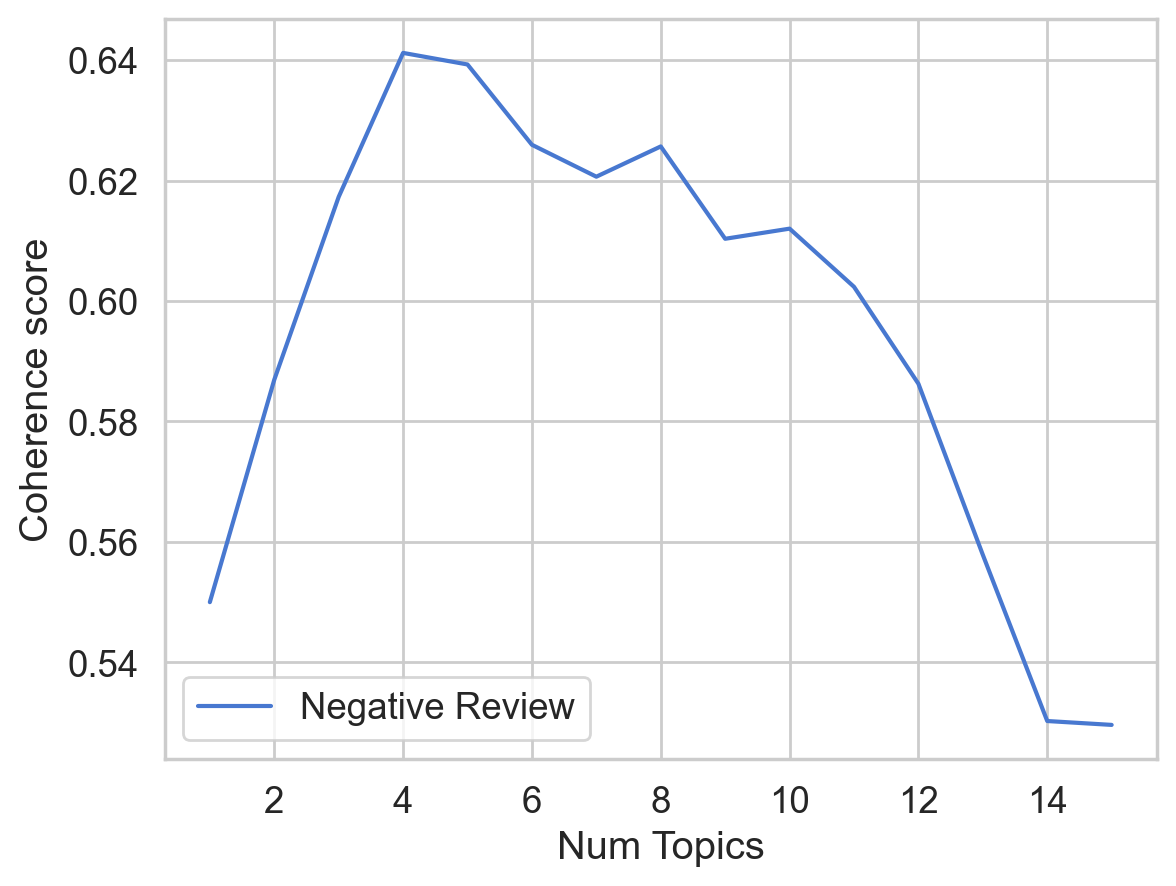

In [209]:
# 긍정리뷰

dictionary = corpora.Dictionary(review_prep_neg)
corpus = [dictionary.doc2bow(doc) for doc in review_prep_neg]

# Compute coherence scores for different numbers of topics (1 to 15)
start, limit, step = 1, 16, 1  # Adjust the range as needed
model_list, coherence_values = compute_coherence_values(dictionary, corpus, review_prep_neg, limit, start, step)

# Plotting the coherence scores
import matplotlib.pyplot as plt

x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("Negative Review",), loc='lower left')
plt.show()

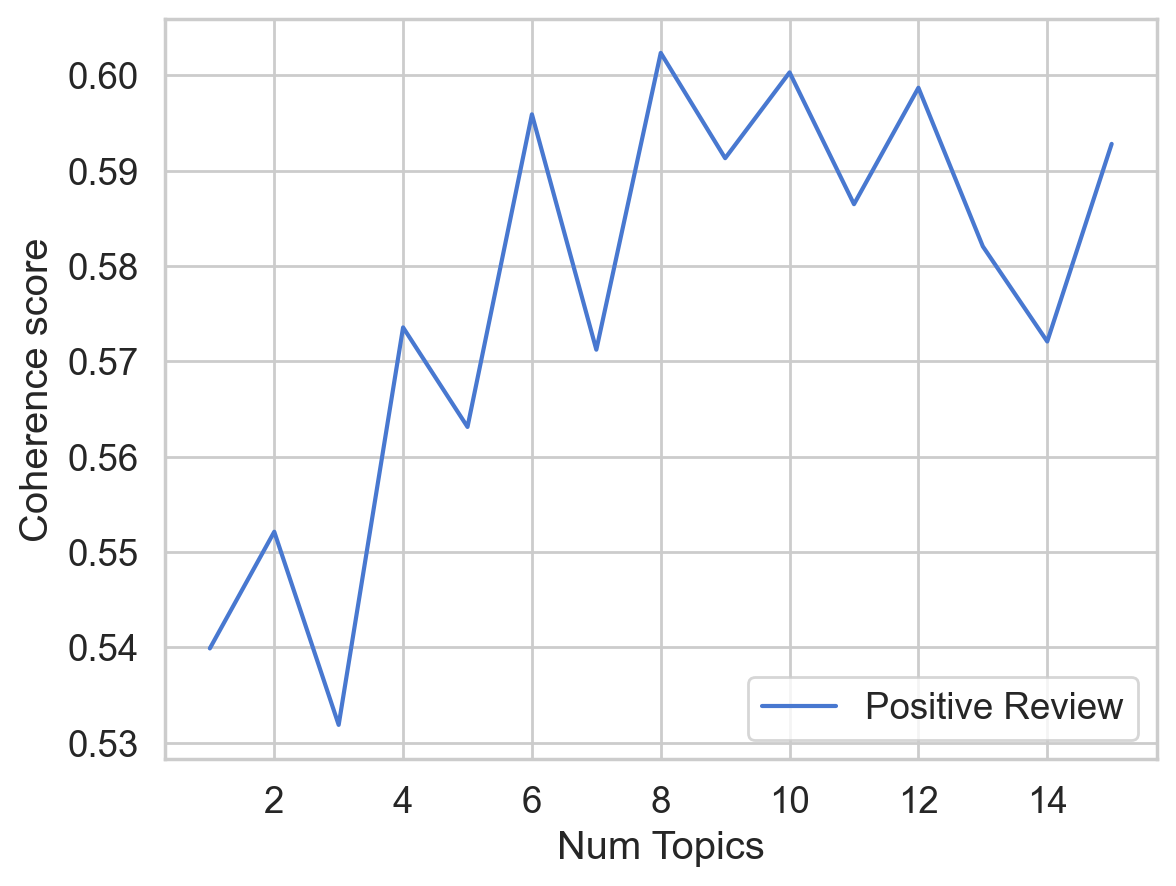

In [210]:
# 긍정리뷰

dictionary = corpora.Dictionary(review_prep_pos)
corpus = [dictionary.doc2bow(doc) for doc in review_prep_pos]


start, limit, step = 1, 16, 1  # Adjust the range as needed
model_list, coherence_values = compute_coherence_values(dictionary, corpus, review_prep_pos, limit, start, step)

x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("Positive Review",), loc='lower right')
plt.show()

### 3-2) 하이퍼파라미터 

토픽 개수 10으로 설정

반복회수 15으로 설정

In [211]:
NUM_TOPICS = 10
passes = 15

In [212]:
# LDA Modeling
def lda_modeling(review_prep):
    # 단어 인코딩 및 빈도수 계산
    dictionary = corpora.Dictionary(review_prep)
    corpus = [dictionary.doc2bow(review) for review in review_prep]
    # LDA 모델 학습
    model = gensim.models.ldamodel.LdaModel(corpus,
                                            num_topics = NUM_TOPICS,
                                            id2word = dictionary,
                                            passes = passes)
    return model, corpus, dictionary


### 3-4) 토픽별 단어 구성 출력 함수

In [213]:
import pandas as pd

def print_topic_prop(topics, RATING):
    topic_values = [topic[1] for topic in topics]
    topic_prop = pd.DataFrame({"topic_num": list(range(1, NUM_TOPICS + 1)), "word_prop": topic_values})

    # Excel 파일로 저장, 본인 경로로 수정 필요

    file_path = f'./Result/topic_prop_{RATING}.xlsx'
    topic_prop.to_excel(file_path)

    # 파일을 다운로드
    print(f"File saved to: {file_path}")    
    return (topic_prop )

### 3-5) 시각화 함수

In [214]:
import os
import pyLDAvis
import pyLDAvis.gensim_models

def lda_visualize(model, corpus, dictionary, RATING, result_dir):
    pyLDAvis.enable_notebook()
    result_visualized = pyLDAvis.gensim_models.prepare(model, corpus, dictionary)
    pyLDAvis.display(result_visualized)

    # 시각화 결과 저장
    RESULT_FILE = os.path.join(result_dir, f'lda_result_{RATING}.html')
    pyLDAvis.save_html(result_visualized, RESULT_FILE)     

### 3-6) LDA, 토빅별 단어 구성, 시각화 모두 호출

In [215]:
import random
import numpy as np

# Set a random seed for reproducibility
random.seed(2025)
np.random.seed(2025)

### 부정적 리뷰

In [216]:
model, corpus, dictionary = lda_modeling(review_prep_neg)
model_neg = model

In [217]:
NUM_WORDS=30
topics = model.print_topics(num_words = NUM_WORDS)
topic_prop_neg = print_topic_prop(topics,'neg')


File saved to: ./Result/topic_prop_neg.xlsx


In [218]:
lda_visualize(model, corpus, dictionary,'neg', './Result/')
corpus_neg = corpus

### 긍정적 리뷰

In [219]:
model, corpus, dictionary = lda_modeling(review_prep_pos)
model_pos = model

In [220]:
NUM_WORDS=30
topics = model.print_topics(num_words = NUM_WORDS)
topic_prop_pos = print_topic_prop(topics,'pos')

File saved to: ./Result/topic_prop_pos.xlsx


In [221]:
lda_visualize(model, corpus, dictionary,'pos', './Result/')
corpus_pos = corpus

# 4. WordCloud

In [222]:
from wordcloud import WordCloud
from collections import Counter
import matplotlib.pyplot as plt
import pandas as pd

%matplotlib inline

from matplotlib import font_manager, rc
plt.rcParams['axes.unicode_minus'] = False  

# 한글 폰트 추가
font_path = "/Library/Fonts/Arial Unicode.ttf"
font_name = font_manager.FontProperties(fname=font_path).get_name()
plt.rc('font', family=font_name)


### 4-1)워드 클라우드 호출 함수 정의

In [223]:
def show_wordcloud (Dataframe):
    fig, axes = plt.subplots(2, 5, figsize=(15, 8))
    axes = axes.flatten()
    for index, row in df.iterrows():
        topic_num = row['topic_num']
        word_proportions = row['word_prop']

        words = [word.split('*')[-1].strip().replace('+','') for word in word_proportions.split()]


        word_counts = Counter(words)


        wordcloud = WordCloud(width=400, height=200, background_color='white', font_path=font_path).generate_from_frequencies(word_counts)

        axes[index].imshow(wordcloud, interpolation='bilinear')
        axes[index].set_title(f"Topic {topic_num}")
        axes[index].axis('off')

    # 제목설정
    title = "부정적 리뷰" if Dataframe.equals(pd.DataFrame(topic_prop_neg)) else "긍정적 리뷰"
    fig.suptitle(title, fontsize=60)
    plt.tight_layout()
    plt.axis('off')
    plt.show()


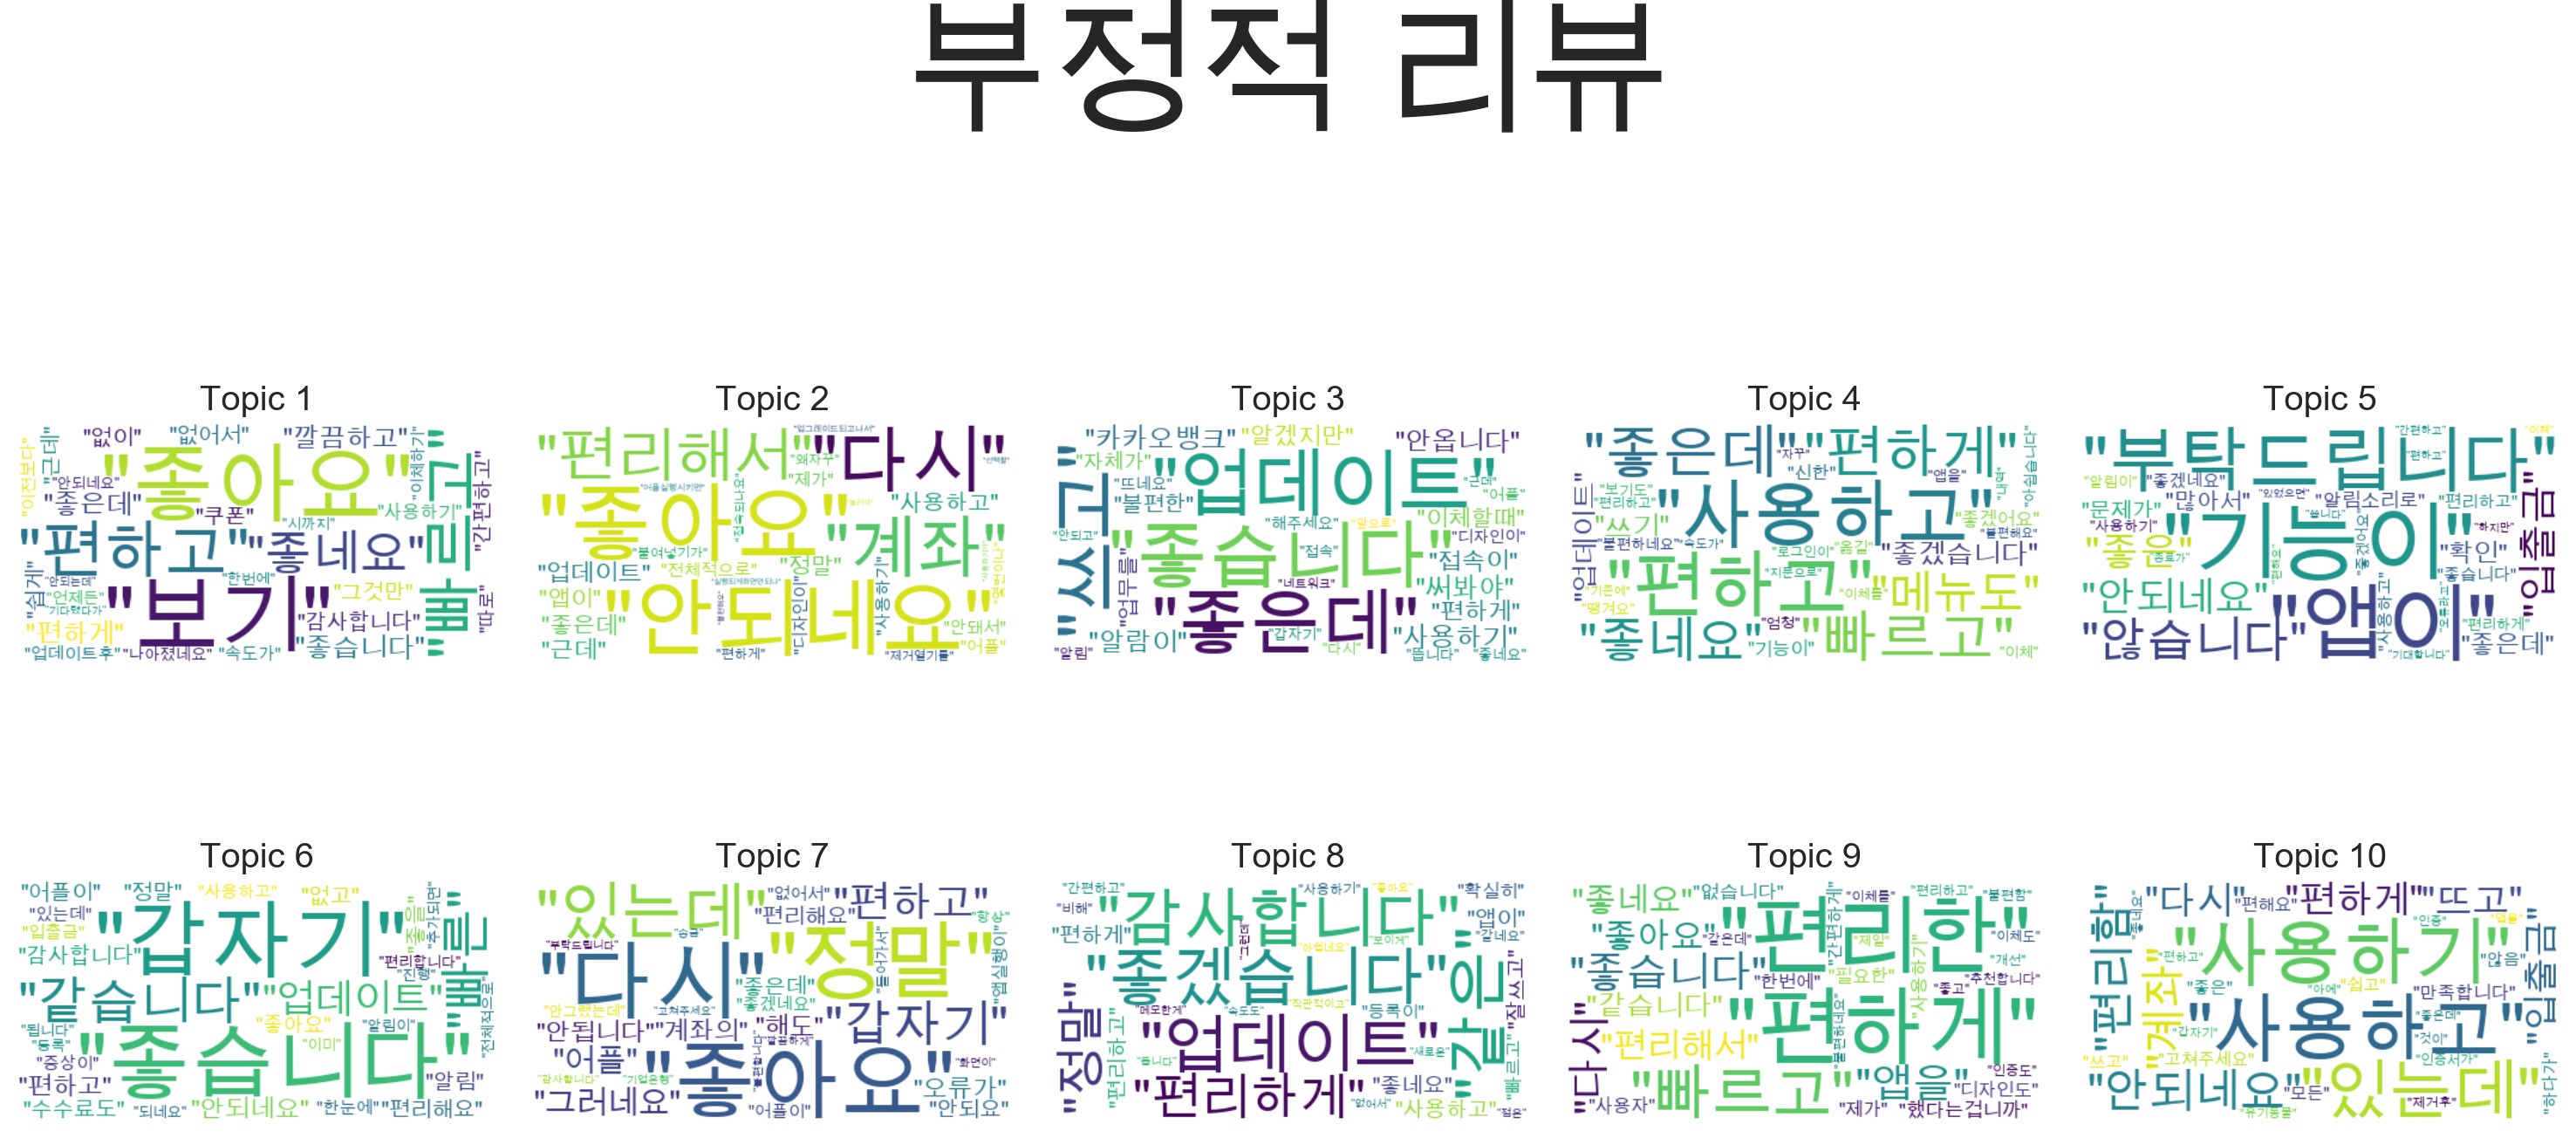

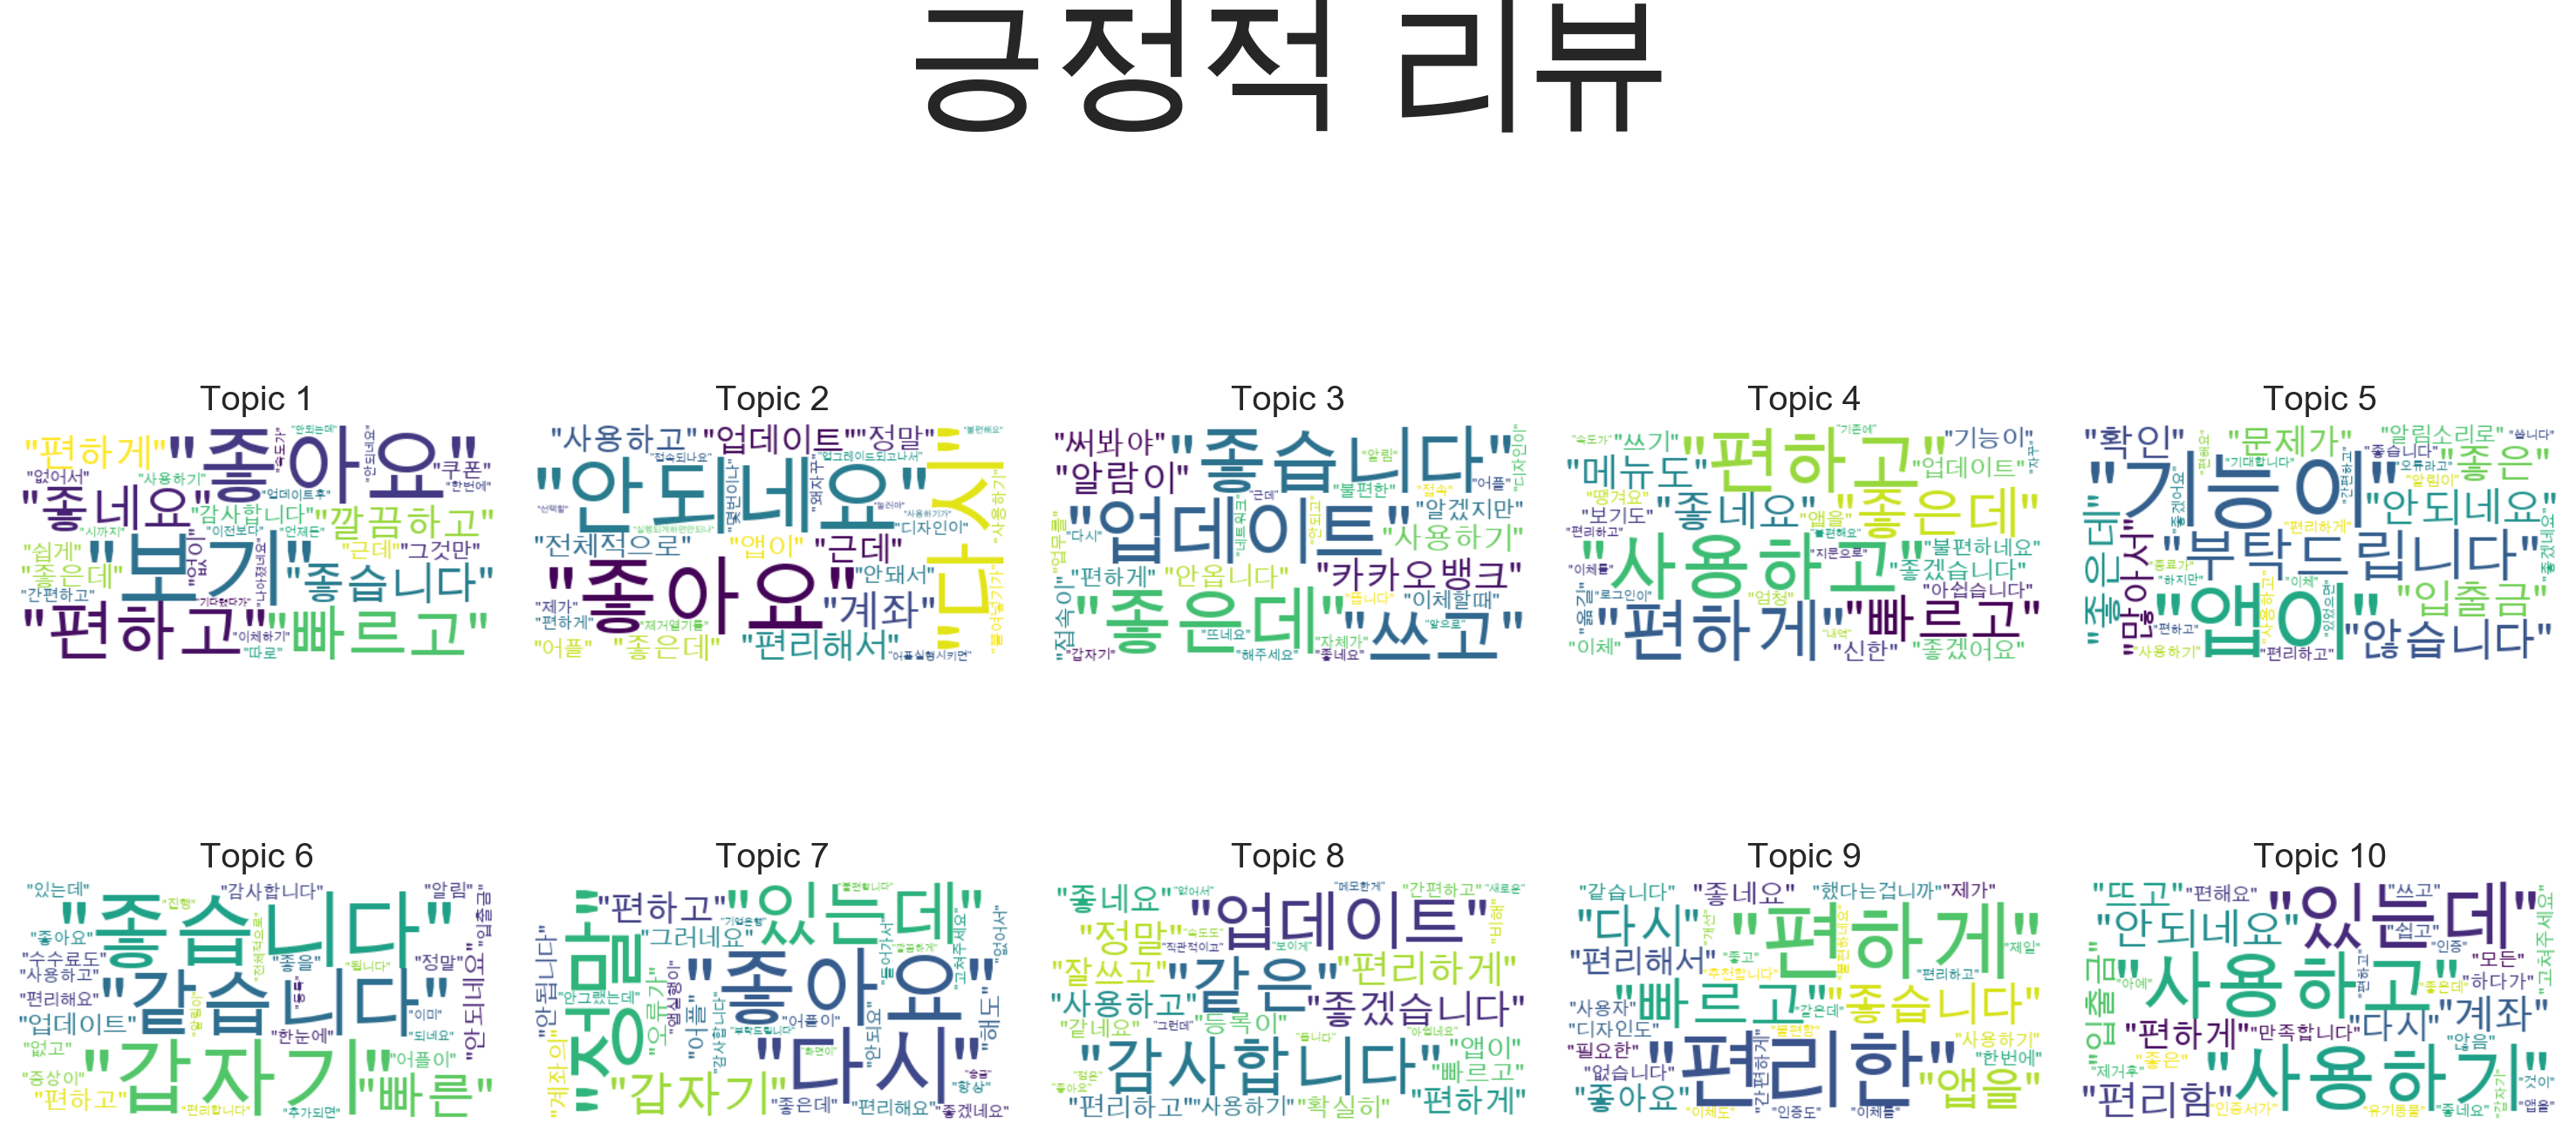

In [224]:
show_wordcloud(pd.DataFrame(topic_prop_neg))
show_wordcloud(pd.DataFrame(topic_prop_pos))

# 5. 토픽 당 샘플 리뷰

In [225]:

neg_doc_lda = model_neg[corpus_neg]
pos_doc_lda = model_pos[corpus_pos]

neg_topic_scores = [[topic_score[1] for topic_score in sent] for sent in neg_doc_lda]
pos_topic_scores = [[topic_score[1] for topic_score in sent] for sent in pos_doc_lda]


neg_df_topics = pd.DataFrame(neg_topic_scores)
pos_df_topics = pd.DataFrame(pos_topic_scores)


neg_top_50_documents = []
neg_original_documents = []  
neg_max_topics_list = []  

pos_top_50_documents = []
pos_original_documents = []
pos_max_topics_list = []

for topic in range(NUM_TOPICS):
    neg_top_50_indices = neg_df_topics[topic].nlargest(50).index
    neg_top_50_documents.extend([review_prep_neg[i] for i in neg_top_50_indices])
    neg_original_documents.extend([review_prep_neg[i] for i in neg_top_50_indices])
    neg_max_topics_list.extend([topic for i in neg_top_50_indices])

    pos_top_50_indices = pos_df_topics[topic].nlargest(50).index
    pos_top_50_documents.extend([review_prep_pos[i] for i in pos_top_50_indices])
    pos_original_documents.extend([review_prep_pos[i] for i in pos_top_50_indices])
    pos_max_topics_list.extend([topic for i in pos_top_50_indices])


neg_result_df = pd.DataFrame({'Document': neg_top_50_documents, 'Topic': neg_max_topics_list})
neg_result_df.to_excel('./Result/top50_docs_per_topic_neg.xlsx', index=False)

pos_result_df = pd.DataFrame({'Document': pos_top_50_documents, 'Topic': pos_max_topics_list})
pos_result_df.to_excel('./Result/top50_docs_per_topic_pos.xlsx', index=False)

### 부정적 리뷰 토픽 샘플 단어

In [226]:
for i in range(NUM_TOPICS):
    neg_sample_docs = neg_result_df.loc[neg_result_df['Topic'] == i].head(5)
    print(f"Sample documents for Topic {i}")
    print(neg_sample_docs['Document'].to_string(header=False, index=False))
    print("\n")
    

Sample documents for Topic 0
[전에는, 타사이체, 수수료가, 붙지안았습니다업뎃후에, 수수료가, 왜붙는지요, 매달마...
[전에는, 타사이체, 수수료가, 붙지안았습니다업뎃후에, 수수료가, 왜붙는지요, 매달마...
[아주편하게, 사용하고있었는데겔럭시사용중소프트웨어업데이트후에, 카카오뱅크가, 실행이되...
[출금, 입금, 표시창에, 나타나지, 않아요, 쉽게, 다가, 갈수있는, 창구가, 필요...
[아주편하게, 사용하고있었는데겔럭시사용중소프트웨어업데이트후에, 카카오뱅크가, 실행이되...


Sample documents for Topic 1
     [썼는지, 알림, 표시가, 나왔는데, 최근에, 알림, 표시가, 안뜹니다]
     [썼는지, 알림, 표시가, 나왔는데, 최근에, 알림, 표시가, 안뜹니다]
[로그인부터, 타기관, 인증서, 등록오류, 전반적으로, 속도가, 굉장히, 느려요]
[로그인부터, 타기관, 인증서, 등록오류, 전반적으로, 속도가, 굉장히, 느려요]
   [비밀번호를, 맞는대로, 입력을, 아니라고, 비밀번호, 쓸데없이, 바꿨네요]


Sample documents for Topic 2
[지문등록해놨는데, 자꾸, 안열립니다, 다른손가락은, 오류라고, 뜨는데, 맞는, 손가...
[지문등록해놨는데, 자꾸, 안열립니다, 다른손가락은, 오류라고, 뜨는데, 맞는, 손가...
[계좌번호변경할려고했는데, 앱에서최신버전이필요하다고, 업데이트하려는데, 업데이트했는데...
[계좌번호변경할려고했는데, 앱에서최신버전이필요하다고, 업데이트하려는데, 업데이트했는데...
   [일부터, 지금까지의, 입출금정보가, 나오지, 않고, 어떻게, 해야될지, 모르겠네용]


Sample documents for Topic 3
[비밀번호, 누적오류를, 재설정하려고, 문의해도, 이상한, 답변만하고, 문의, 자체가안됨]
[비밀번호, 누적오류를, 재설정하려고, 문의해도, 이상한, 답변만하고, 문의, 자체가안됨]
[이체해야하는데, 갑자기, 네트워크연결이, 안되었다고하는데, 이유

### 긍정적 리뷰 토픽 샘플 단어

In [227]:
for i in range(NUM_TOPICS):
    pos_sample_docs = pos_result_df.loc[pos_result_df['Topic'] == i].head(5)
    print(f"Sample documents for Topic {i}")
    print(pos_sample_docs['Document'].to_string(header=False, index=False))
    print("\n")

Sample documents for Topic 0
[잘쓰고잇는데, 요번에, 업데이트되면서, 버스카드를, 핸드폰으로도, 충전할수있어서, ...
[잘쓰고잇는데, 요번에, 업데이트되면서, 버스카드를, 핸드폰으로도, 충전할수있어서, ...
[보안프로그램, 보안프로그램을, 앱자체에, 내장해줬으면, 좋겠습니다, 광고투성이고, ...
[보안프로그램, 보안프로그램을, 앱자체에, 내장해줬으면, 좋겠습니다, 광고투성이고, ...
[기간, 설정에서, 날짜, 선택하지, 않았을때, 화면에, 보여진, 달의, 일로, 맞춰...


Sample documents for Topic 1
[기기바꾸고, 패턴등록하는데, 계속오류나서, 어플, 다시, 설치했더니, 신분증, 인식...
[기기바꾸고, 패턴등록하는데, 계속오류나서, 어플, 다시, 설치했더니, 신분증, 인식...
[깔끔한, 디자인과, 쉽고, 편한, 메뉴구성등, 전반적인, 디자인이, 잘되었다고, 생...
[깔끔한, 디자인과, 쉽고, 편한, 메뉴구성등, 전반적인, 디자인이, 잘되었다고, 생...
[화면을, 리모콘으로, 생체인식, 화면부터, 나오니까, 리모콘을, 찾아, 가야해서, ...


Sample documents for Topic 2
[알람이, 안옵니다, 멀쩡히, 쓰고, 업뎃이후에, 알람이, 안옵니다, 폰은, 쓰고있습니다]
[알람이, 안옵니다, 멀쩡히, 쓰고, 업뎃이후에, 알람이, 안옵니다, 폰은, 쓰고있습니다]
       [접송이, 안될, 때가, 잦음, 오후엔, 전혀접속이, 안되고, 있음, 폴더임]
       [접송이, 안될, 때가, 잦음, 오후엔, 전혀접속이, 안되고, 있음, 폴더임]
[주거래은행이라, 자주사용하는데, 필요한, 메뉴들이, 직관적으로, 보여, 좋습니다, ...


Sample documents for Topic 3
[신한, 앱들은, 페이지, 이동, 중간에, 거쳐, 가는, 페이지가, 많음]
[신한, 앱들은, 페이지, 이동, 중간에, 거쳐, 가는, 페이지가, 많음]
   [하루적금, 적어도, 일러스트는, 다르게, 해주